# Test plotting loss

February 9, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import stats, interpolate
from scipy import linalg as LA

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("..")

In [2]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.bptt import BPTT
from algorithms.rflo import RFLO
from algorithms.reinforce import REINFORCE

from utils.plotting import plot_trained_trajectories

### Train RNN on four targets using RFLO

In [3]:
trial_duration = 20
n_in=4
frac_on = 0.5

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

# Pretrain

14it [00:00, 138.48it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: 0.1
sig_out: 0.01
tau_rec: 5
eta_in: 0.1
eta_rec: 0.1
eta_out: 0.1
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: True
tau_vel: 2
dt_vel: 0.05
rng: <mtrand.RandomState object at 0x7fd78384b5e8>
apply_to :  ['w_rec', 'w_out']
online :  True
weight_transport :  True


500it [00:01, 349.00it/s]


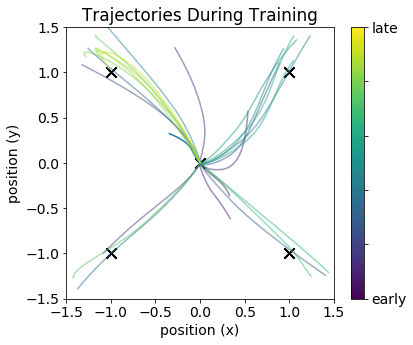

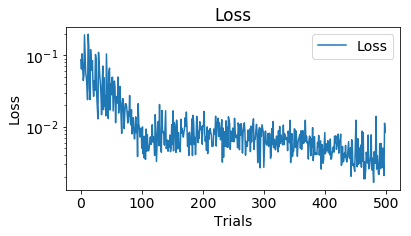

In [6]:
# Set RNN Parameters
params = RNNparams(n_in=4,n_rec=50,n_out=2,tau_rec=5,
               eta_in=0.1,eta_rec=0.1,eta_out=0.1,
               sig_in=0.0,sig_rec=0.1,sig_out=0.01,
               velocity_transform=True, tau_vel = 2, dt_vel = 0.05,
               rng=np.random.RandomState(1))
params.print_params()

# Initialize RNN
net0 = RNN(params)

# initialize simulation
sim0 = Simulation(net0)

# instantiate learning algorithm
# Specify particular matrix/unit to apply algorithm
rflo0 = RFLO(net0,apply_to=['w_rec','w_out'],online=True,weight_transport=True)  
#bptt = BPTT(net0,apply_to=['w_rec','w_out'],online=False) # something strange happening here
rflo0.print_params()


sim0.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[rflo0], probe_types=[], plot=True, plot_freq=20)


In [5]:
sim0.session_probes.keys()

dict_keys([])

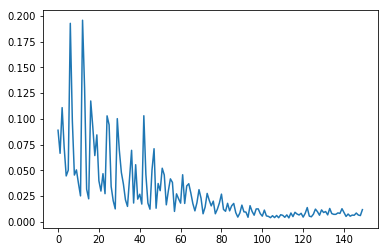

In [11]:
# calculate average loss
loss_av = []
for trial in sim0.session_probes['loss']:
    loss_av.append(np.mean(trial))
""" Data """
# H1_pre = h1_pre[0]
# for i in range(len(h1_pre)-1):
#     H1_pre = np.concatenate([H1_pre,h1_pre[i+1]],axis=0)
plt.plot(loss_av)